In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/beijing.csv')
data.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,12.97,0,0


In [3]:
# Create a new dataframe with only the 'pm2.5' column 
data1 = data.filter(['pm2.5'])

In [4]:
data2=data1.dropna()

In [5]:
dataset = data2.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .6 ))

window_size = 60
training_data_len

25055

In [6]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# create scaler
scaler = StandardScaler()
# fit and transform in one step
scaled_data = scaler.fit_transform(dataset)

print ('scaled_data.shape',len(scaled_data))
scaled_data

scaled_data.shape 41757


array([[ 0.3301143 ],
       [ 0.53652547],
       [ 0.65602667],
       ...,
       [-0.96267141],
       [-0.9843989 ],
       [-0.94094391]])

In [7]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len)]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(window_size, len(train_data)):
    x_train.append(train_data[i-window_size:i, 0])
    y_train.append(train_data[i, 0])
    if i<= window_size + 1:
        print('x_train',x_train)
        print('\ny_train',y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print ('x_train.shape:',x_train.shape)

x_train [array([ 0.3301143 ,  0.53652547,  0.65602667,  0.89502906,  0.42788801,
        0.11283939,  0.06938441,  0.27579557,  0.23234059,  0.36270554,
        0.4496155 ,  0.57998045,  0.53652547,  0.71034539,  0.64516292,
        0.60170794,  0.65602667,  0.71034539,  0.77552787,  0.54738921,
        0.60170794,  0.71034539,  0.62343543,  0.29752307, -0.09357177,
       -0.3868929 , -0.36516541, -0.47380286, -0.36516541, -0.16961799,
       -0.08270802, -0.13702675, -0.18048173, -0.13702675, -0.22393672,
       -0.00666181,  0.0911119 , -0.09357177, -0.0283893 , -0.03925304,
       -0.13702675, -0.31084668, -0.40862039, -0.49553035, -0.29998293,
       -0.28911919, -0.24566421, -0.27825544, -0.21307297, -0.44121162,
       -0.79971522, -0.78885148, -0.76712399, -0.78885148, -0.85403395,
       -0.75626024, -0.78885148, -0.77798773, -0.77798773, -0.79971522])]

y_train [-0.7562602422751948]

x_train [array([ 0.3301143 ,  0.53652547,  0.65602667,  0.89502906,  0.42788801,
        0.11

In [8]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import tensorflow as tf

def build_LSTM_model():
    input = tf.keras.layers.Input(
        shape=(x_train.shape[1], 1), name ="input"
    )
    x = tf.keras.layers.LSTM(128, return_sequences=True)(input)
    
    x = tf.keras.layers.LSTM(64, return_sequences=False, dropout=0.5)(x)
    
    x = tf.keras.layers.Dense(25 , activation="relu", name ="dense_1")(x)
    
    output = tf.keras.layers.Dense(1, name="last_dense")(x)
               
    model = tf.keras.Model(inputs=input, outputs=output)
    
    return model

LSTM_model = build_LSTM_model()
LSTM_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 60, 1)]           0         
                                                                 
 lstm (LSTM)                 (None, 60, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 25)                1625      
                                                                 
 last_dense (Dense)          (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [9]:
epochs = 50
batch_size = 500
early_stopping_patience = 17


# Compile the model
LSTM_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = LSTM_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/50
50/50 [==============================] - 11s 18ms/step - loss: 0.3583
Epoch 2/50
50/50 [==============================] - 1s 16ms/step - loss: 0.1391
Epoch 3/50
50/50 [==============================] - 1s 15ms/step - loss: 0.1062
Epoch 4/50
50/50 [==============================] - 1s 16ms/step - loss: 0.0919
Epoch 5/50
50/50 [==============================] - 1s 16ms/step - loss: 0.0868
Epoch 6/50
50/50 [==============================] - 1s 17ms/step - loss: 0.0828
Epoch 7/50
50/50 [==============================] - 1s 17ms/step - loss: 0.0810
Epoch 8/50
50/50 [==============================] - 1s 17ms/step - loss: 0.0791
Epoch 9/50
50/50 [==============================] - 1s 17ms/step - loss: 0.0782
Epoch 10/50
50/50 [==============================] - 1s 16ms/step - loss: 0.0760
Epoch 11/50
50/50 [==============================] - 1s 16ms/step - loss: 0.0767
Epoch 12/50
50/50 [==============================] - 1s 16ms/step - loss: 0.0769
Epoch 13/50
50/50 [=================

dict_keys(['loss'])


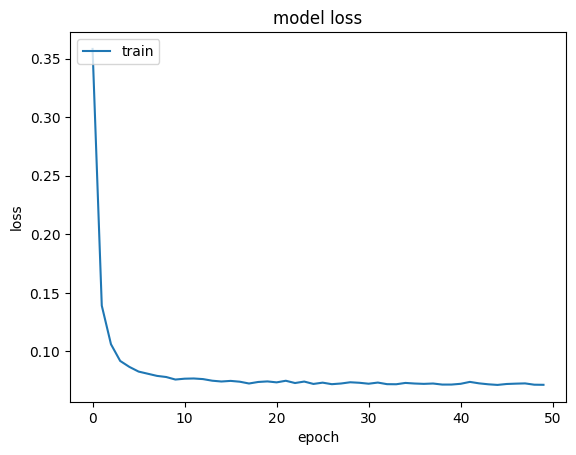

In [10]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())

# summarize history for loss

fig, ax = plt.subplots()
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [11]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - window_size: ]
print ('len(test_data):', len(test_data))

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(window_size, len(test_data)):
    x_test.append(test_data[i-window_size:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = LSTM_model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


len(test_data): 16762
522/522 [==============================] - 2s 4ms/step


<ipython-input-12-f9b328b4d2d2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = predictions


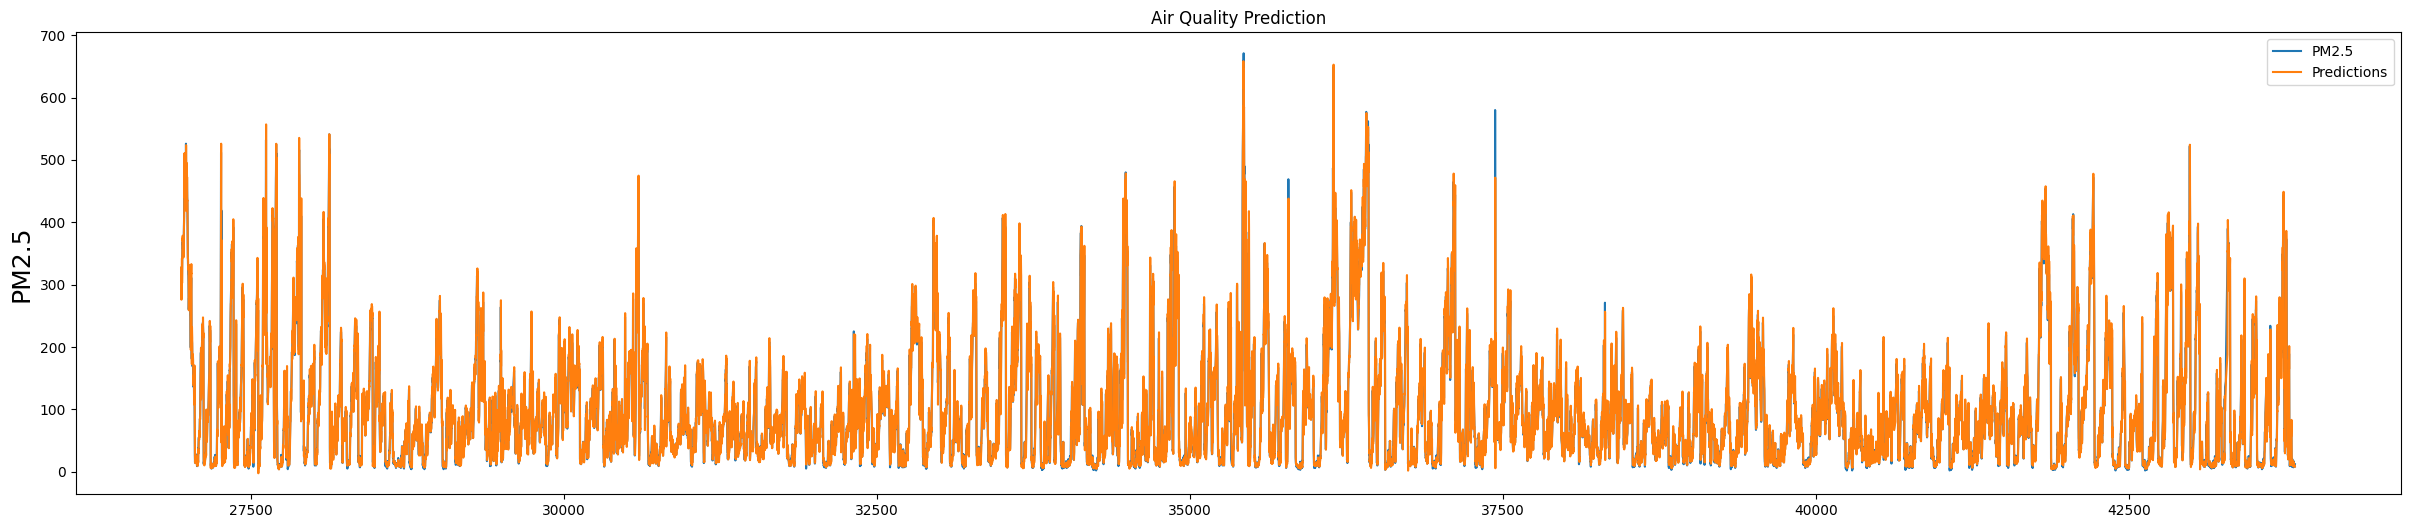

In [12]:
# Plot the data
train = data2[:training_data_len]
test = data2[training_data_len:]
test['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(30,6))
plt.title('Air Quality Prediction')
plt.ylabel('PM2.5', fontsize=18)
#plt.plot(train['Close'])
plt.plot(test[['pm2.5', 'Predictions']])
plt.legend(['PM2.5', 'Predictions'], loc='upper right')
plt.show()

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
mae = mean_absolute_error(test['Predictions'],y_test)
mse = mean_squared_error(test['Predictions'], y_test)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(test['Predictions'],y_test)
r = r2_score(test['Predictions'], y_test)

In [14]:
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)
print('R-Squared Score = {}'.format(r))

Mean Absolute Error: 11.788971292717045
Mean Squared Error: 469.11703615095234
Root Mean Squared Error: 21.659109772817356
Mean Absolute Percentage Error: 0.18910019122864055
R-Squared Score = 0.9447046689092711
